In [1]:
import geopandas as gpd
from shapely.geometry import Point
import os
import requests

In [ ]:
import pandas as pd

file = "warsaw_predictions_merged.csv"

df = pd.read_csv(file)
df.head()

,cell_id,latitude,longitude,has_coords,has_prediction_stats,has_images,total_detections,high_confidence_boxes,low_confidence_boxes,mask_coverage_pct,...,class_distribution_0_count,class_distribution_0_high_conf,class_distribution_0_low_conf,class_distribution_1_count,class_distribution_1_high_conf,class_distribution_1_low_conf,high_conf_std_confidence,high_conf_std_mask_ratio,low_conf_std_confidence,low_conf_std_mask_ratio
0,0,52.099,20.8527,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,52.099,20.8557,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,52.099,20.8587,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,52.099,20.8617,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,52.099,20.8647,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Based on 'latitude' and 'longitude' columns determine Warsaw district for each row
local_folder = "data_districts"
local_geojson = os.path.join(local_folder, "warszawa-dzielnice.geojson")
gdf = gpd.read_file(local_geojson)
gdf = gdf[gdf["name"] != "Warszawa"].reset_index(drop=True)
def get_district(row):
    punkt = Point(row["longitude"], row["latitude"])
    for _, district in gdf.iterrows():
        if district["geometry"].contains(punkt):
            return district["name"]
    return None
df["district"] = df.apply(get_district, axis=1)
df.head()

,cell_id,latitude,longitude,has_coords,has_prediction_stats,has_images,total_detections,high_confidence_boxes,low_confidence_boxes,mask_coverage_pct,...,class_distribution_0_high_conf,class_distribution_0_low_conf,class_distribution_1_count,class_distribution_1_high_conf,class_distribution_1_low_conf,high_conf_std_confidence,high_conf_std_mask_ratio,low_conf_std_confidence,low_conf_std_mask_ratio,district
0,0,52.099,20.8527,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
1,1,52.099,20.8557,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
2,2,52.099,20.8587,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
3,3,52.099,20.8617,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
4,4,52.099,20.8647,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None


In [6]:
df['district'].value_counts().sort_index()

district
Bemowo             363
Białołęka         1066
Bielany            473
Mokotów            516
Ochota             144
Praga Południe     327
Praga Północ       165
Rembertów          279
Targówek           355
Ursus              141
Ursynów            638
Wawer             1163
Wesoła             336
Wilanów            534
Wola               285
Włochy             412
Śródmieście        234
Żoliborz           122
Name: count, dtype: int64

In [8]:
df.to_csv("warsaw_predictions_with_districts.csv", index=False)

In [9]:
df.columns

Index(['cell_id', 'latitude', 'longitude', 'has_coords',
       'has_prediction_stats', 'has_images', 'total_detections',
       'high_confidence_boxes', 'low_confidence_boxes', 'mask_coverage_pct',
       'high_conf_mask_coverage_pct', 'avg_confidence', 'avg_mask_ratio',
       'param_mask_threshold', 'param_mask_low_confidence',
       'high_conf_boxes_count', 'low_conf_boxes_count', 'min_confidence',
       'max_confidence', 'median_confidence', 'min_mask_ratio',
       'max_mask_ratio', 'high_conf_avg_confidence',
       'high_conf_avg_mask_ratio', 'low_conf_avg_confidence',
       'low_conf_avg_mask_ratio', 'mask_ratio_distribution_0-25%',
       'mask_ratio_distribution_25-50%', 'mask_ratio_distribution_50-75%',
       'mask_ratio_distribution_75-100%', 'class_distribution_0_count',
       'class_distribution_0_high_conf', 'class_distribution_0_low_conf',
       'class_distribution_1_count', 'class_distribution_1_high_conf',
       'class_distribution_1_low_conf', 'high_conf_std_

In [11]:
# Display all columns in pd settings
pd.set_option('display.max_columns', None)
df.head()

,cell_id,latitude,longitude,has_coords,has_prediction_stats,has_images,total_detections,high_confidence_boxes,low_confidence_boxes,mask_coverage_pct,high_conf_mask_coverage_pct,avg_confidence,avg_mask_ratio,param_mask_threshold,param_mask_low_confidence,high_conf_boxes_count,low_conf_boxes_count,min_confidence,max_confidence,median_confidence,min_mask_ratio,max_mask_ratio,high_conf_avg_confidence,high_conf_avg_mask_ratio,low_conf_avg_confidence,low_conf_avg_mask_ratio,mask_ratio_distribution_0-25%,mask_ratio_distribution_25-50%,mask_ratio_distribution_50-75%,mask_ratio_distribution_75-100%,class_distribution_0_count,class_distribution_0_high_conf,class_distribution_0_low_conf,class_distribution_1_count,class_distribution_1_high_conf,class_distribution_1_low_conf,high_conf_std_confidence,high_conf_std_mask_ratio,low_conf_std_confidence,low_conf_std_mask_ratio,district
0,0,52.099,20.8527,True,True,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
1,1,52.099,20.8557,True,True,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
2,2,52.099,20.8587,True,True,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
3,3,52.099,20.8617,True,True,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None
4,4,52.099,20.8647,True,True,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None


In [1]:
import pandas as pd

df = pd.read_csv("warsaw_predictions_with_districts.csv")
df.head()

,cell_id,latitude,longitude,has_coords,has_prediction_stats,has_images,total_detections,high_confidence_boxes,low_confidence_boxes,mask_coverage_pct,...,class_distribution_0_high_conf,class_distribution_0_low_conf,class_distribution_1_count,class_distribution_1_high_conf,class_distribution_1_low_conf,high_conf_std_confidence,high_conf_std_mask_ratio,low_conf_std_confidence,low_conf_std_mask_ratio,district
0,0,52.099,20.8527,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1,52.099,20.8557,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,2,52.099,20.8587,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,3,52.099,20.8617,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,4,52.099,20.8647,True,True,True,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [2]:
from visualisation_plots import *

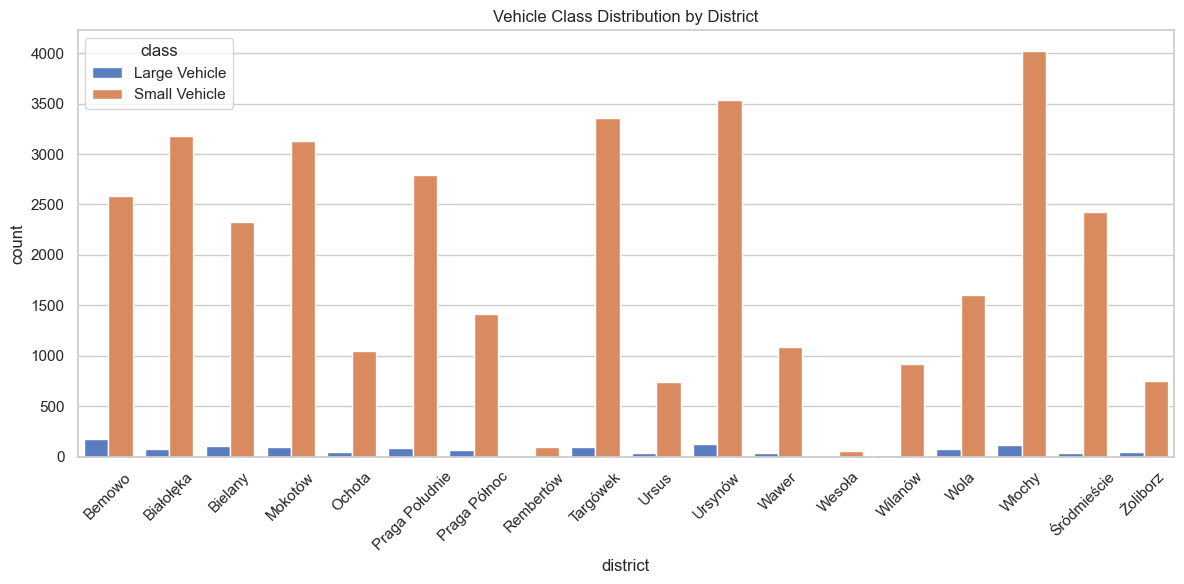

In [3]:
plot_vehicle_class_distribution(df)

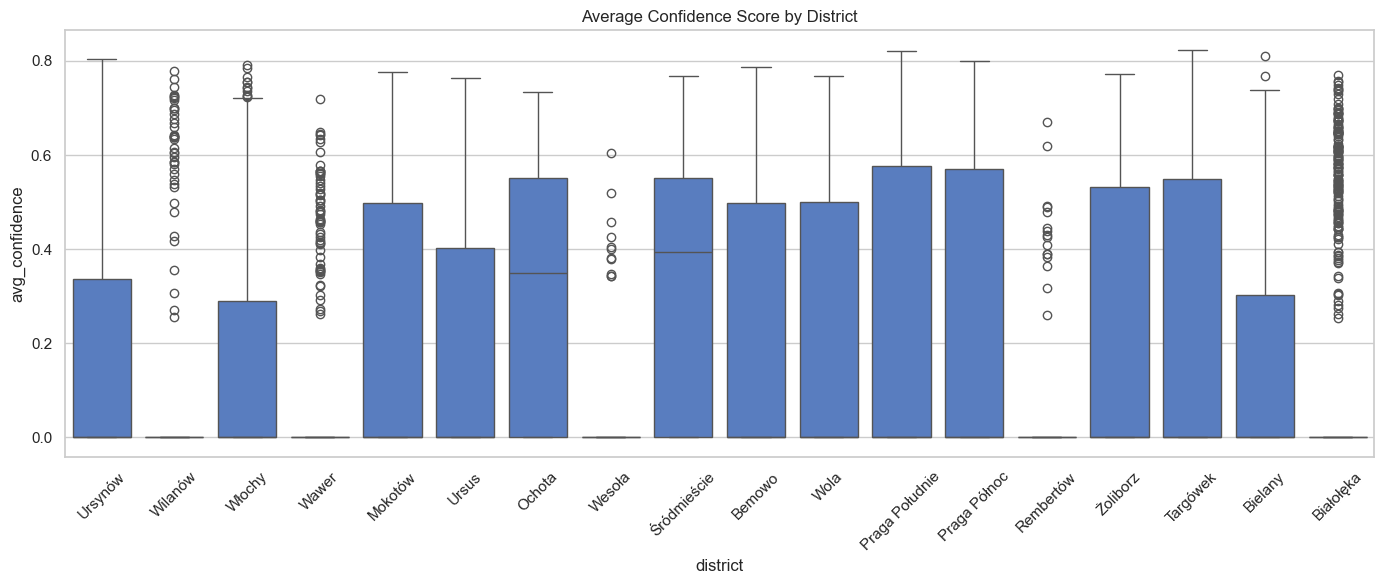

In [4]:
plot_confidence_distributions(df)


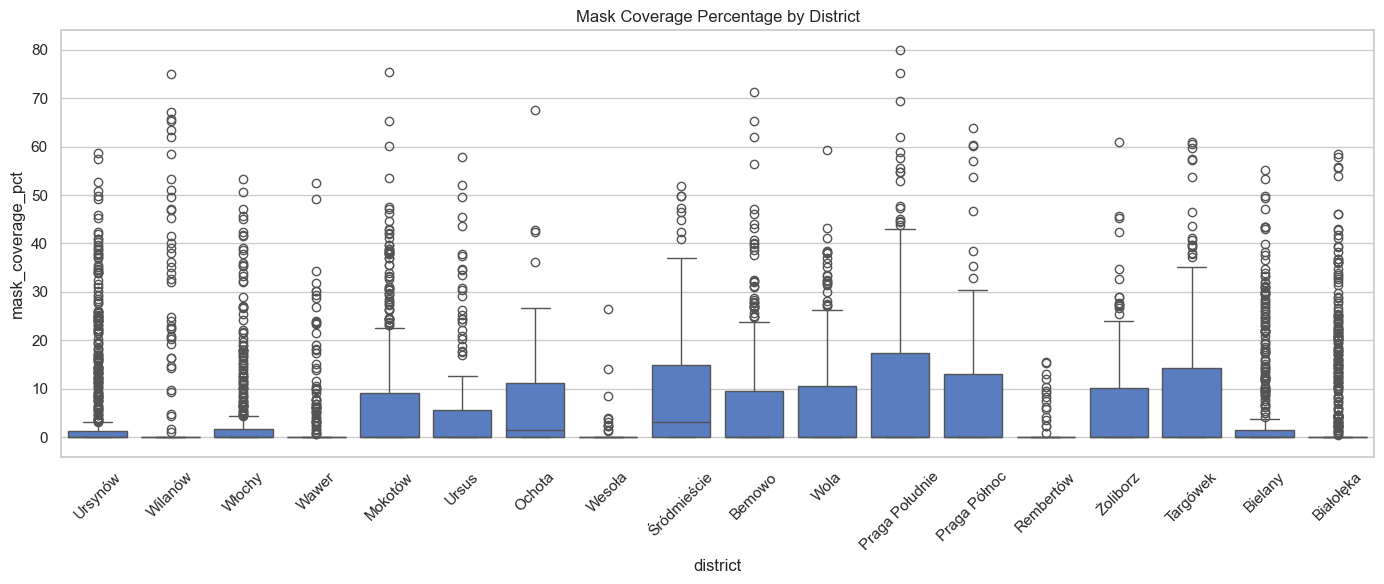

In [6]:
plot_mask_coverage_distributions(df)


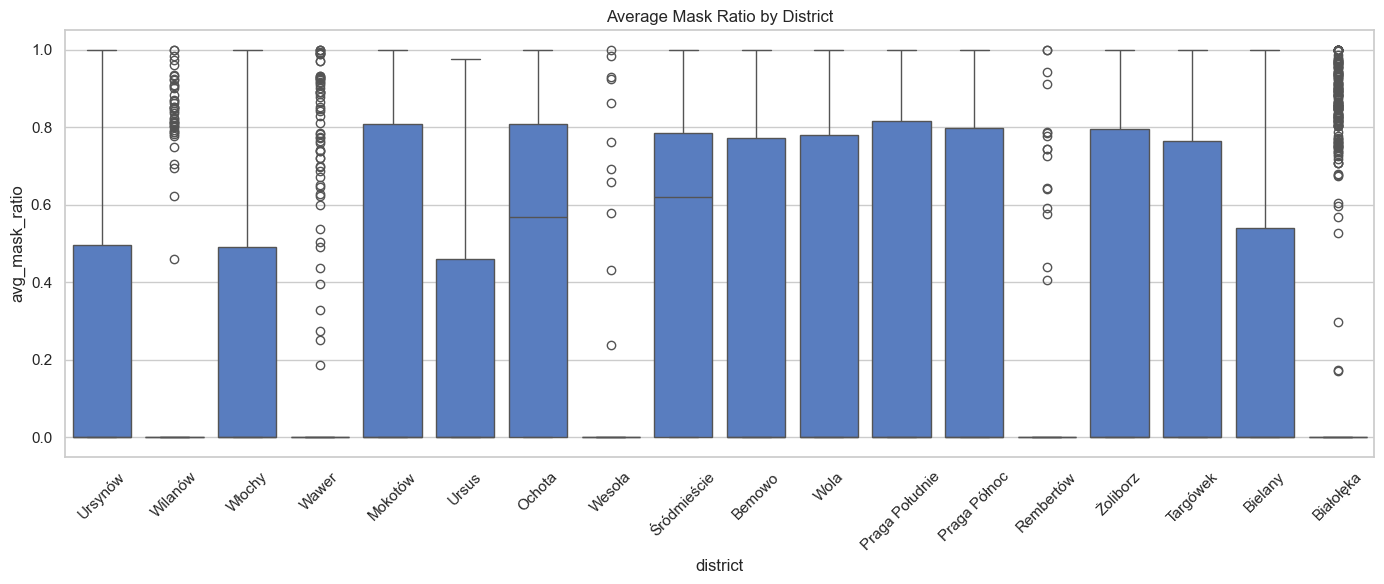

In [3]:
plot_avg_mask_ratio(df)

In [4]:
plot_conf_vs_mask_ratio(df)


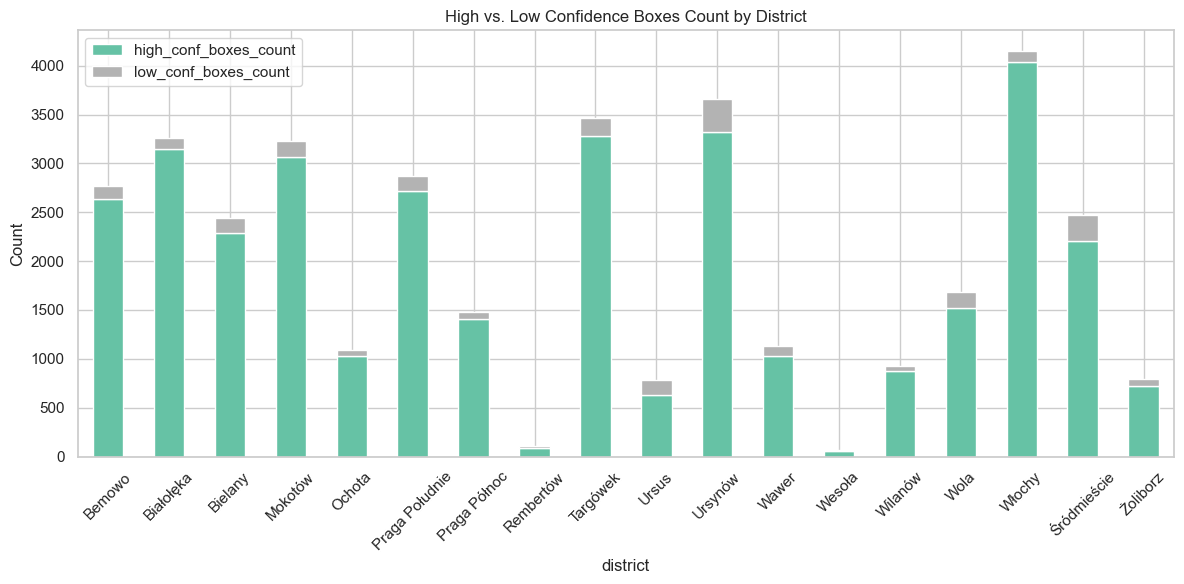

In [8]:
plot_high_vs_low_conf_counts(df)


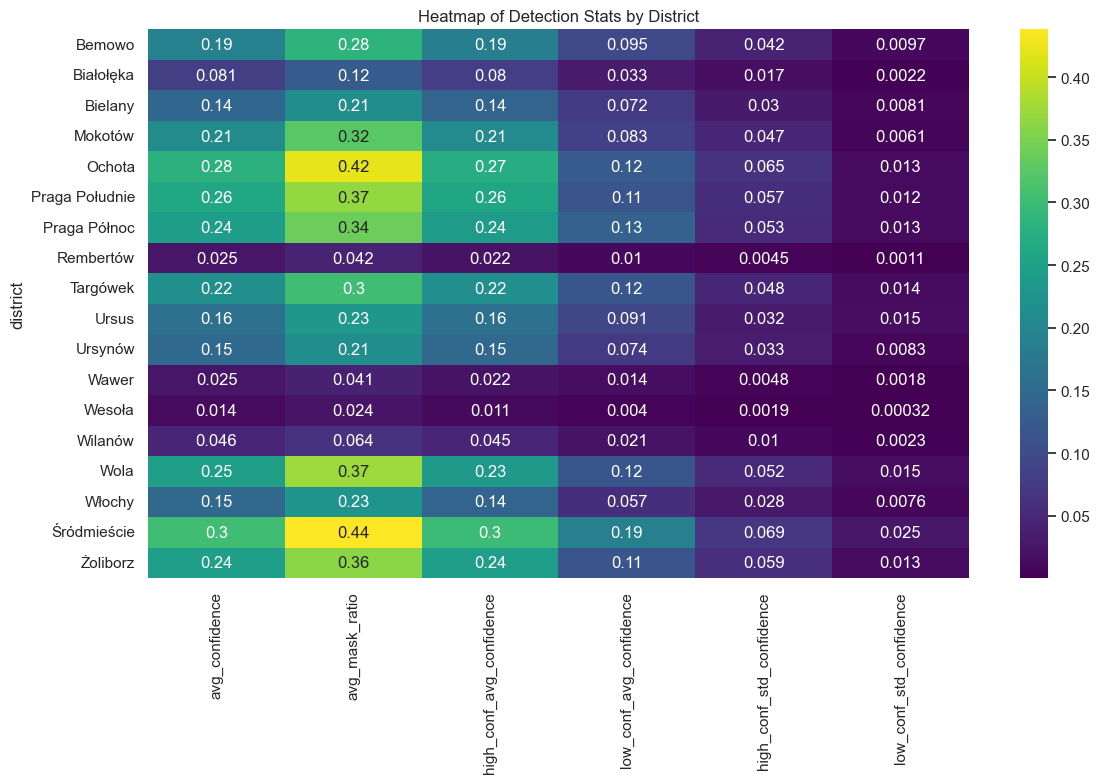

In [9]:
plot_detection_stats_heatmap(df)


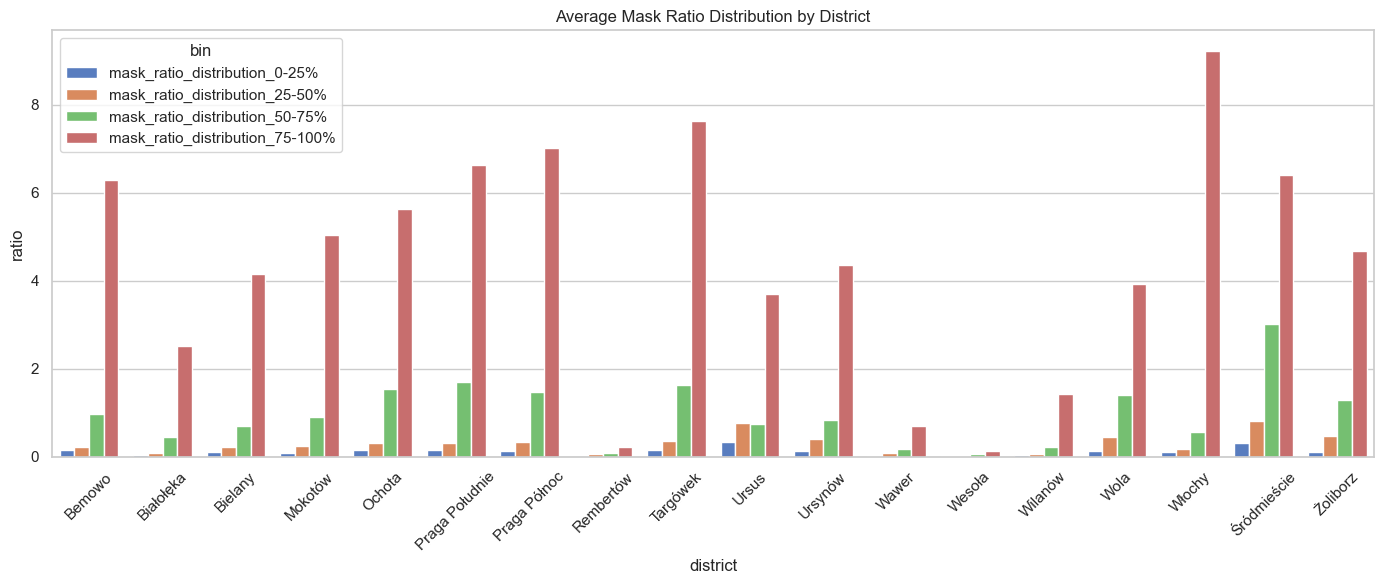

In [10]:
plot_mask_ratio_distribution(df)


In [3]:
plot_geospatial_mask_coverage(df)
